In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', 'X')

In [2]:
force_users = 'jedi', 'sith'
path = Path('forceusers')

In [9]:
if not path.exists():
    path.mkdir()
    
for user in force_users:
    dest = (path/user)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, user)
    download_images(dest, urls = results.attrgot('contentUrl'))

In [10]:
files = get_image_files(path)
files

(#283) [Path('forceusers/sith/5ecfe359-addc-43a8-91f3-9e888725a854.jpg'),Path('forceusers/sith/beca8146-e9a0-41cb-a6d7-894adba306c0.jpg'),Path('forceusers/sith/f61a95d5-52cb-49fc-aa95-f70b586199c1.jpg'),Path('forceusers/sith/2b9f964b-a5bb-458a-9b8f-1e608e208419.jpg'),Path('forceusers/sith/d30185fb-8f78-4d8b-9b8e-d08e390b0396.png'),Path('forceusers/sith/2642ef34-d29c-404a-9eb4-0ef4115c65ec.jpg'),Path('forceusers/sith/089b3a30-2c50-4468-9485-2f5499d9d6fd.jpg'),Path('forceusers/sith/f6e7b5cd-531e-4edb-92d9-7e929a652fbc.jpg'),Path('forceusers/sith/be752c65-7f40-4ef9-9b9c-277a0abfc4df.jpg'),Path('forceusers/sith/a356fdf8-335f-4d2f-9f2a-fab0752206a6.jpg')...]

In [12]:
failed = verify_images(files)
failed

(#15) [Path('forceusers/sith/279cab99-9f87-4dc8-b3c8-5751d8af97b5.jpeg'),Path('forceusers/sith/970065c1-3b02-45b3-bedf-32750b0fa9c3.jpg'),Path('forceusers/sith/6609ef06-078b-48b5-a5a7-8efc3628a848.jpg'),Path('forceusers/sith/2dfa0c42-8830-4973-97e1-162b26198070.jpg'),Path('forceusers/sith/e2532837-ae43-487e-b0a3-3b49f21ef046.png'),Path('forceusers/sith/591b9cf1-77e7-4e79-904c-1fe222a4b641.jpg'),Path('forceusers/jedi/de611699-004b-4bc5-9a19-3f6f55adfb45.jpg'),Path('forceusers/jedi/a18f1b05-26fc-478b-bdd7-f30ac1f1f3aa.jpg'),Path('forceusers/jedi/9b1751cd-7798-40e4-902d-1e508172c20f.jpg'),Path('forceusers/jedi/e48f8e1c-c524-42dd-adad-e2971636ab8a.jpg')...]

In [13]:
failed.map(Path.unlink)

(#15) [None,None,None,None,None,None,None,None,None,None...]

In [3]:
data_loaders = ImageDataLoaders.from_folder(
    path,
    valid_pct = 0.2,
    seed = 15,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)

In [4]:
learn = vision_learner( data_loaders, resnet18, metrics = error_rate )
learn.fine_tune(7)

/home/sam/miniconda3/envs/fastbook/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sam/miniconda3/envs/fastbook/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.372663,1.582843,0.400000,00:14


/home/sam/miniconda3/envs/fastbook/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,1.023628,0.974821,0.375000,00:13
1,0.928951,0.539205,0.175000,00:11
2,0.734891,0.482069,0.200000,00:13
3,0.616284,0.491720,0.150000,00:11
4,0.507962,0.476962,0.125000,00:10
5,0.445060,0.438706,0.125000,00:13
6,0.410730,0.417867,0.125000,00:11


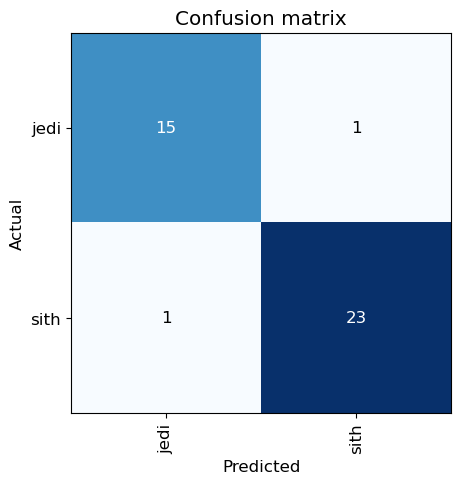

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

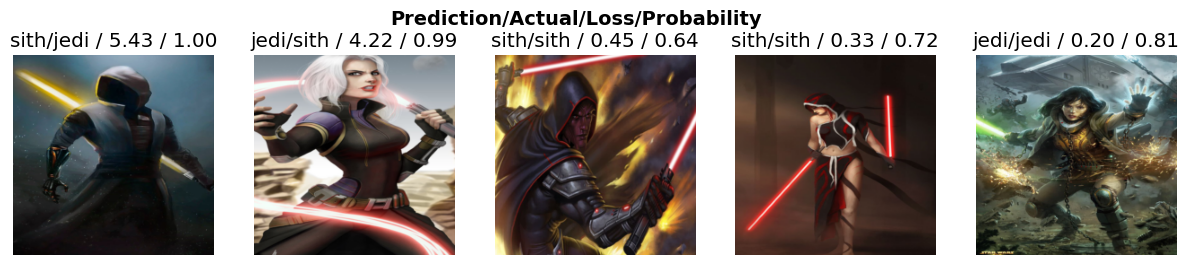

In [9]:
interp.plot_top_losses(5, nrows=1)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/sam/miniconda3/envs/fastbook/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/sam/miniconda3/envs/fastbook/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
for index in cleaner.delete(): 
    cleaner.fns[index].unlink()
    
for index in cleaner.change():
    shutil.move(str(cleaner.fns[index]), path/cat)

In [10]:
learn.export()